# Data Question 1: An Exploration of UN data
Habeeb Kotun Jr.<br>
September 16, 2021

## Line Items 3 and 4
Import the required packages with their customary aliases.<br>
Use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Line Item 5
Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.<br>
Take a look at the first 10 rows.<br>
Look at the last 5 rows. Do you see a problem?<br>
Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')
print(gdp_df.head(10))
print(gdp_df.tail())

gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skiprows=[6870, 6871])

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2019  2065.036398              NaN
1     Afghanistan  2018  2033.779002              NaN
2     Afghanistan  2017  2058.383832              NaN
3     Afghanistan  2016  2057.062164              NaN
4     Afghanistan  2015  2068.265904              NaN
5     Afghanistan  2014  2102.385234              NaN
6     Afghanistan  2013  2116.465454              NaN
7     Afghanistan  2012  2075.491747              NaN
8     Afghanistan  2011  1904.559799              NaN
9     Afghanistan  2010  1957.029338              NaN
     Country or Area                                      Year        Value  \
6865        Zimbabwe                                      1992  3054.889178   
6866        Zimbabwe                                      1991  3426.598094   
6867        Zimbabwe                                      1990  3324.348171   
6868   footnoteSeqID                                  Footnote          NaN   
6869       

## Line Item 6
Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [3]:
gdp_df = gdp_df.drop(columns='Value Footnotes')
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2019     2065.036398
1     Afghanistan  2018     2033.779002
2     Afghanistan  2017     2058.383832
3     Afghanistan  2016     2057.062164
4     Afghanistan  2015     2068.265904
...           ...   ...             ...
6863     Zimbabwe  1994     3263.934978
6864     Zimbabwe  1993     3033.504852
6865     Zimbabwe  1992     3054.889178
6866     Zimbabwe  1991     3426.598094
6867     Zimbabwe  1990     3324.348171

[6868 rows x 3 columns]


## Line Item 7
How many rows and columns does gdp_df have? 6868 rows and 3 columns <br>
What are the data types of its columns? Country column has type object, Year column has type int64, and GDP_Per_Capita has type float64. <br>
If any of the columns are not the expected types, figure out why and fix it. N/A

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


## Line Item 8
Which years are represented in this dataset? 1990 through 2014 <br>
Take a look at the number of observations per year. What do you notice? They have increased steadily over the years. This means over time more countries have reported their data.

In [5]:
gdp_df['Year'].value_counts()

2014    238
2016    238
2017    238
2015    238
2013    238
2012    237
2018    237
2011    237
2009    236
2010    236
2008    235
2006    235
2007    235
2005    234
2004    234
2003    233
2002    233
2001    232
2019    231
2000    231
1999    224
1997    223
1998    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

## Line Item 9
How many countries are represented in this dataset? 238 countries <br>
Which countries are least represented in the dataset? Sint Maarten, Turks and Caicos, and Djibouti are the three least represented countries in this list. <br>
Why do you think these countries have so few observations? Why do you think these countries have so few observations? Because they are countries that have only recently started reporting their data.

In [6]:
gdp_df['Country'].value_counts()


Fiji                         30
Namibia                      30
St. Lucia                    30
Comoros                      30
Ecuador                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

## Line Items 10 and 11
Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.<br>
Use .describe() to find the summary statistics for GDP per capita in 2014.

In [7]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


## Line Item 12
Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram).<br>
How would you describe the shape of the distribution? The historgram is right skewed and unimodal.

(array([105.,  57.,  25.,  17.,  17.,   9.,   3.,   1.,   1.,   1.,   1.,
          0.,   0.,   0.,   1.]),
 array([   822.61045782,  11202.04535061,  21581.48024341,  31960.91513621,
         42340.35002901,  52719.78492181,  63099.2198146 ,  73478.6547074 ,
         83858.0896002 ,  94237.524493  , 104616.95938579, 114996.39427859,
        125375.82917139, 135755.26406419, 146134.69895699, 156514.13384978]),
 <BarContainer object of 15 artists>)

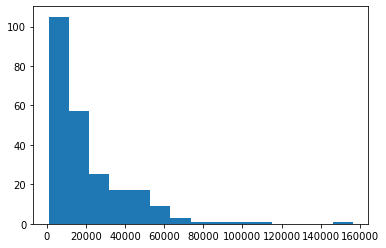

In [8]:
plt.hist(gdp_2014['GDP_Per_Capita'], bins=15)

## Line Item 13
Find the top 5 countries and bottom 5 countries by GDP per capita in 2014.<br>
Top 5 countries are Bermuda, Singapore, Qatar, Luxembourg, and Macao SAR.
Bottom 5 countries are Central African Republic, Burundi, Malawi, Dem. Rep. Congo, and Niger.

In [9]:
print(gdp_2014.set_index('Country')['GDP_Per_Capita'].sort_values().tail())
print('\n')
print(gdp_2014.set_index('Country')['GDP_Per_Capita'].sort_values().head())

Country
Bermuda              77361.104881
Singapore            87808.663157
Qatar                95578.416973
Luxembourg          108760.916030
Macao SAR, China    156514.133850
Name: GDP_Per_Capita, dtype: float64


Country
Central African Republic     822.610458
Burundi                      886.235777
Malawi                      1027.208496
Dem. Rep. Congo             1029.790785
Niger                       1127.615541
Name: GDP_Per_Capita, dtype: float64


## Line Item 14
Now, return to the full dataset, gdp_df.<br>
Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount.<br>
Drop any rows that are missing values for either 1990 or 2017.<br>
Save the result to a dataframe named gdp_pivoted.

In [10]:
subset = (gdp_df['Year'] == 2017) | (gdp_df['Year'] == 1990)
gdp_pivoted = gdp_df[subset].pivot_table('GDP_Per_Capita', index='Country', columns='Year').dropna(0)

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


## Line Item 15
Create a new column in gdp_pivoted named Percent_Change.<br>
This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.<br>

In [11]:
gdp_pivoted['Percent Change'] = (gdp_pivoted.loc[:,2017] - gdp_pivoted.loc[:,1990]) / gdp_pivoted.loc[:,1990]
print(gdp_pivoted)

Year                         1990          2017  Percent Change
Country                                                        
Albania               4842.734635  12811.759436        1.645563
Algeria               8746.352901  11737.409353        0.341978
Angola                5783.429064   7310.901738        0.264112
Antigua and Barbuda  15459.551675  19840.076123        0.283354
Arab World            9694.667544  14555.474921        0.501390
...                           ...           ...             ...
Vanuatu               2888.309393   3116.645194        0.079055
Vietnam               1673.249634   7155.745829        3.276556
World                 9680.269697  16253.385518        0.679022
Zambia                2190.182814   3485.005238        0.591194
Zimbabwe              3324.348171   3028.245976       -0.089071

[207 rows x 3 columns]


## Line Item 16
How many countries experienced a negative percent change in GDP per capita from 1990 to 2017? 17 countries

In [12]:
print(gdp_pivoted[gdp_pivoted.loc[:,'Percent Change'] < 0])

Year                               1990          2017  Percent Change
Country                                                              
Brunei                     71230.862143  60995.681114       -0.143690
Burundi                     1184.842440    773.571858       -0.347110
Central African Republic    1201.677234    912.802052       -0.240393
Comoros                     3061.360665   3032.254682       -0.009508
Congo                       5115.210903   4274.296414       -0.164395
Dem. Rep. Congo             1819.723315   1059.810775       -0.417598
Gabon                      18179.265733  15006.764091       -0.174512
Guinea-Bissau               1994.669656   1925.237737       -0.034809
Haiti                       3229.618638   2980.960856       -0.076993
Kyrgyz Republic             5158.317569   5046.691535       -0.021640
Madagascar                  1853.051624   1584.422678       -0.144966
Tajikistan                  3869.043636   3089.530208       -0.201474
The Bahamas         

## Line Item 17
Which country had the highest % change in GDP per capita?<br>
Create a line plot showing this country's GDP per capita for all years from 1990 to 2017.<br>
Answer: Equatorial Guinea had the highest % change in GDP per capita.

Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?<br>
Answer: Guinea's plot shows a steady rise in GDP per capita until around 2008 when it started to decrease. In comparison, China has been exponentially growing its GDP per capita with no decreases seen over the years.Both countries look like they started around 200 GDP per capita in 1990. Although they're trends have differed over the years, it seems they will be close to converging to roughly the same GDP per capita in the coming years.<br>

Bonus: Put both line charts on the same plot.

In [43]:
gdp_sort = gdp_pivoted.sort_values("Percent Change", ascending=False)
highest = gdp_sort.iloc[0]
second_highest = gdp_sort.iloc[1]
print("Country with the highest % change in GDP per capita: " + highest.name)
print("Country with the second highest % change in GDP per capita: " + second_highest.name)

Country with the highest % change in GDP per capita: Equatorial Guinea
Country with the second highest % change in GDP per capita: China


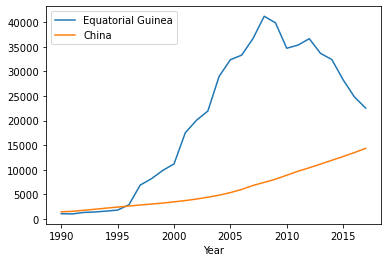

In [44]:
guinea_1990_2017 = gdp_df.set_index('Country').loc['Equatorial Guinea']
china_1990_2017 = gdp_df.set_index('Country').loc['China']

ax = guinea_1990_2017[(guinea_1990_2017['Year'] <= 2017)].plot(x='Year',y='GDP_Per_Capita')
china_1990_2017[(china_1990_2017['Year'] <= 2017)].plot(ax=ax, x='Year',y='GDP_Per_Capita')
ax.legend(['Equatorial Guinea','China'])

## Line Item 18
Read in continents.csv contained in the data folder into a new dataframe called continents.

In [34]:
continents = pd.read_csv('../data/continents.csv')

## Line Item 19
Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [35]:
gdp_df = pd.merge(right=gdp_df, left=continents, how='inner')

## Line Item 20
Determine the number of countries per continent. Create a bar chart showing this.